<a href="https://colab.research.google.com/github/Pham-Canh-An-Tien/data-mining/blob/main/wild_animal_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tien Pham
1001909301

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_DIR =  "drive/MyDrive/Colab Notebooks/Data"
BATCH_SIZE = 64
EPOCHS = 50
HEIGHT = 224
WIDTH = 224



# Data Loading

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

Found 1377 files belonging to 6 classes.
Using 1102 files for training.
Found 1377 files belonging to 6 classes.
Using 275 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="drive/MyDrive/Colab Notebooks/Test",
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

Found 346 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['Chetah', 'Fox', 'Hynea', 'Lion', 'Tiger', 'Wolf']

# Convolutional Neural Network

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # layers.Conv2D(512, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    # layers.Conv2D(1024, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names))
    ])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50)

Epoch 1/50
9/9 [==============================] - 183s 4s/step - loss: 1.8233 - accuracy: 0.1724 - val_loss: 1.7864 - val_accuracy: 0.1745
Epoch 2/50
9/9 [==============================] - 1s 149ms/step - loss: 1.7523 - accuracy: 0.2278 - val_loss: 1.7156 - val_accuracy: 0.2291
Epoch 3/50
9/9 [==============================] - 1s 143ms/step - loss: 1.5854 - accuracy: 0.3394 - val_loss: 1.4833 - val_accuracy: 0.3636
Epoch 4/50
9/9 [==============================] - 1s 144ms/step - loss: 1.4203 - accuracy: 0.4238 - val_loss: 1.4037 - val_accuracy: 0.4000
Epoch 5/50
9/9 [==============================] - 1s 143ms/step - loss: 1.2913 - accuracy: 0.4728 - val_loss: 1.3119 - val_accuracy: 0.4836
Epoch 6/50
9/9 [==============================] - 1s 144ms/step - loss: 1.2592 - accuracy: 0.5073 - val_loss: 1.3039 - val_accuracy: 0.4618
Epoch 7/50
9/9 [==============================] - 1s 143ms/step - loss: 1.2441 - accuracy: 0.5154 - val_loss: 1.2491 - val_accuracy: 0.5164
Epoch 8/50
9/9 [=====

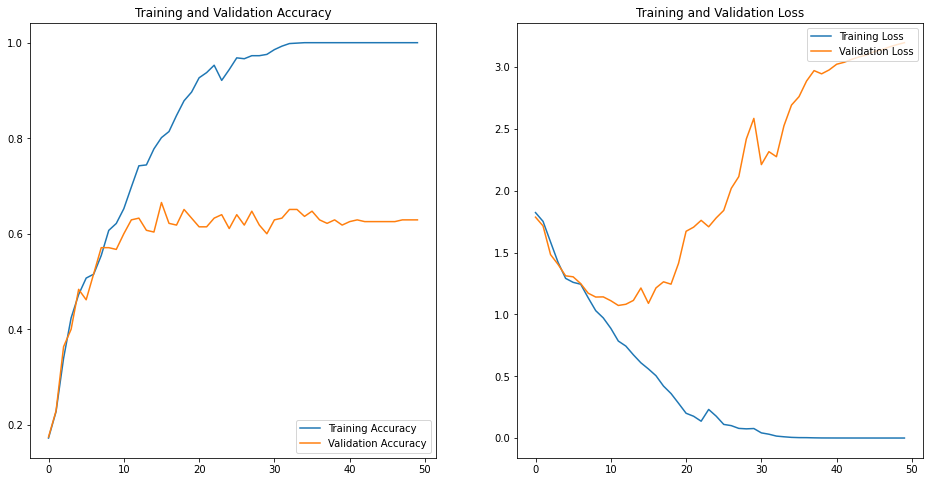

In [ ]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Agumentation


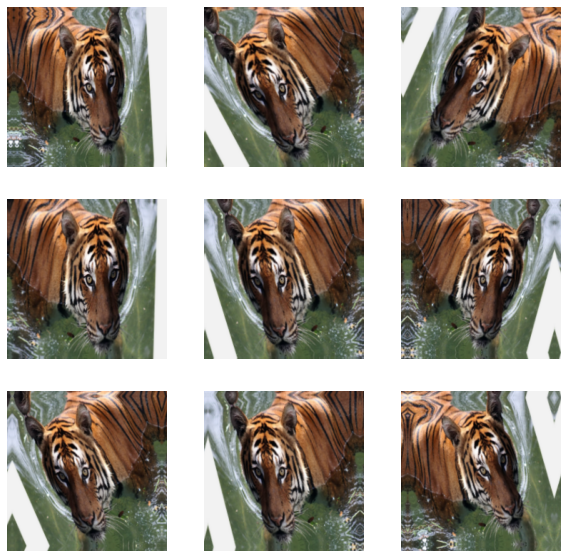

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(HEIGHT, WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    ])

image, label = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype('uint8'))
  plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # layers.Conv2D(1024, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names))
    ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50)

Epoch 1/50
9/9 [==============================] - 3s 234ms/step - loss: 1.8133 - accuracy: 0.1760 - val_loss: 1.7863 - val_accuracy: 0.1745
Epoch 2/50
9/9 [==============================] - 2s 210ms/step - loss: 1.7685 - accuracy: 0.2105 - val_loss: 1.7383 - val_accuracy: 0.2182
Epoch 3/50
9/9 [==============================] - 2s 211ms/step - loss: 1.7242 - accuracy: 0.2613 - val_loss: 1.6968 - val_accuracy: 0.2327
Epoch 4/50
9/9 [==============================] - 2s 216ms/step - loss: 1.6131 - accuracy: 0.3539 - val_loss: 1.5929 - val_accuracy: 0.3418
Epoch 5/50
9/9 [==============================] - 2s 209ms/step - loss: 1.5895 - accuracy: 0.3466 - val_loss: 1.6258 - val_accuracy: 0.3055
Epoch 6/50
9/9 [==============================] - 2s 210ms/step - loss: 1.4568 - accuracy: 0.4247 - val_loss: 2.6216 - val_accuracy: 0.2618
Epoch 7/50
9/9 [==============================] - 2s 212ms/step - loss: 1.4163 - accuracy: 0.4229 - val_loss: 2.0350 - val_accuracy: 0.3418
Epoch 8/50
9/9 [====

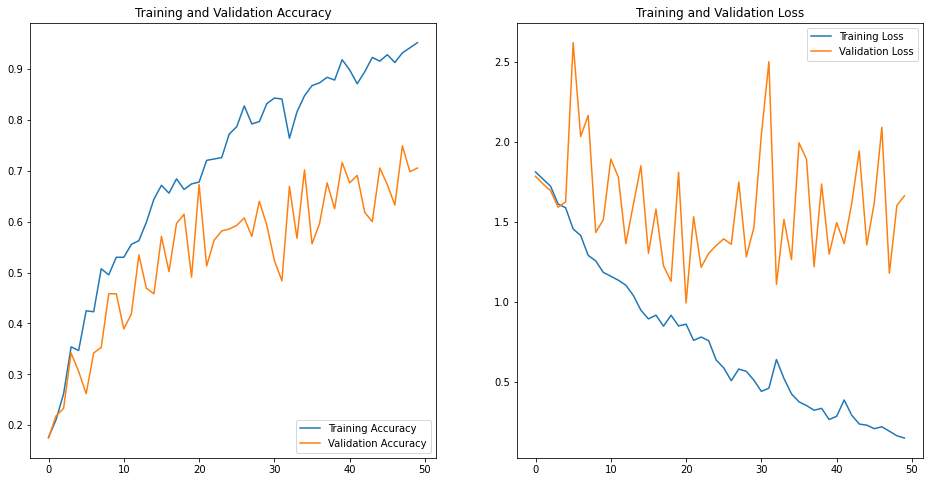

In [ ]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# K-Nearest Neighbor

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
Categories = ['Chetah', 'Lion', 'Wolf', 'Tiger', 'Hynea', 'Fox']
flat_data_arr = []
target_arr = []
data_dir = 'drive/MyDrive/Colab Notebooks/Data'

In [ ]:
for i in Categories:
  print(f'loading from category: {i}')
  path = os.path.join(data_dir, i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array, (160, 160, 3))
    flat_data_arr.append(img_resized.flatten().tolist())
    target_arr.append(Categories.index(i))
  print(f'loaded category {i} successfully')

loading from category: Chetah
loaded category Chetah successfully
loading from category: Lion
loaded category Lion successfully
loading from category: Wolf
loaded category Wolf successfully
loading from category: Tiger
loaded category Tiger successfully
loading from category: Hynea
loaded category Hynea successfully
loading from category: Fox
loaded category Fox successfully


In [ ]:
flat_data = np.array(flat_data_arr)
# target = np.array(target_arr)
# df = pd.DataFrame(flat_data)
# df['Target'] = target
# x = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [ ]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=512))
pca.fit(flat_data)
flat_features = pca.transform(flat_data)

In [ ]:
target = np.array(target_arr)
df = pd.DataFrame(flat_features)
df['Target'] = target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
for i in range(2,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc.append(accuracy_score(y_test, y_pred))

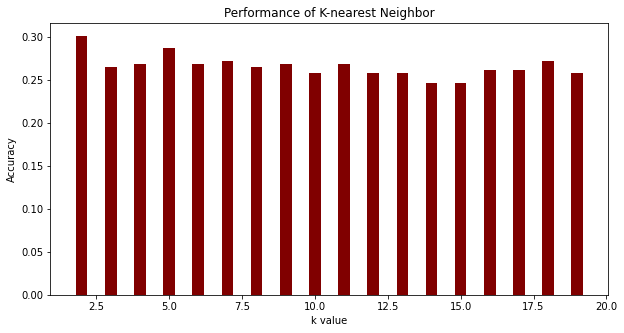

In [ ]:
n = range(2,20)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar(n, acc, color ='maroon',
        width = 0.4)

plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Performance of K-nearest Neighbor")
plt.show()

In [ ]:
y_pred = knn.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.30      0.39        99
           1       0.32      0.30      0.31        50
           2       0.24      0.33      0.28        30
           3       0.00      0.00      0.00         4
           4       0.33      0.21      0.25        77
           5       0.12      0.31      0.18        16

    accuracy                           0.28       276
   macro avg       0.26      0.24      0.23       276
weighted avg       0.38      0.28      0.31       276



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

acc = []
for i in range(100,200,5):
  model = RandomForestClassifier(n_estimators = i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc.append(accuracy_score(y_test, y_pred))


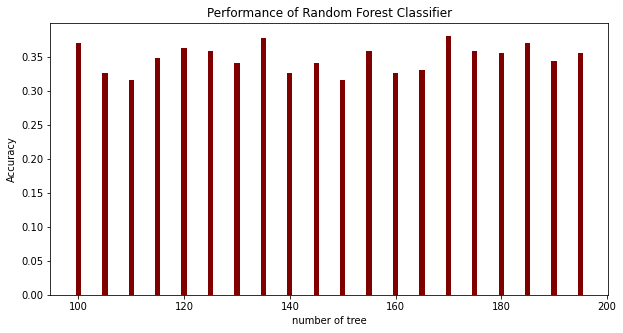

In [ ]:
n = range(100,200,5)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar(n, acc, color ='maroon',
        width = 1)

plt.xlabel("number of tree")
plt.ylabel("Accuracy")
plt.title("Performance of Random Forest Classifier")
plt.show()

# Support Vector Machine

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear', gamma='auto')

In [ ]:
svc.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28        74
           1       0.40      0.33      0.37        57
           2       0.36      0.37      0.36        41
           3       0.16      0.23      0.19        30
           4       0.27      0.32      0.29        41
           5       0.30      0.36      0.33        33

    accuracy                           0.30       276
   macro avg       0.30      0.31      0.30       276
weighted avg       0.32      0.30      0.31       276



# Test performance

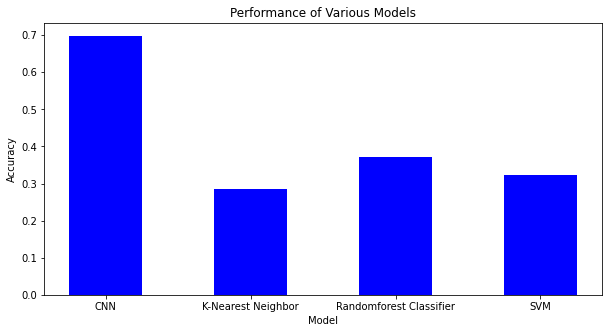

In [ ]:
p = [0.698, 0.284, 0.371, 0.322]
m = ["CNN", "K-Nearest Neighbor", "Randomforest Classifier", "SVM"]
fig = plt.figure(figsize = (10, 5))
plt.bar(m, p, color ='blue',
        width = 0.5)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Performance of Various Models")
plt.show()
